<a href="https://colab.research.google.com/github/emergingsana123/Iris_clusteringClassification/blob/main/IrisClassification_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mpl_toolkits.mplot3d import Axes3D


In [2]:
data = pd.read_csv("/content/IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.value_counts

<bound method DataFrame.value_counts of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris = sns.load_dataset('iris')

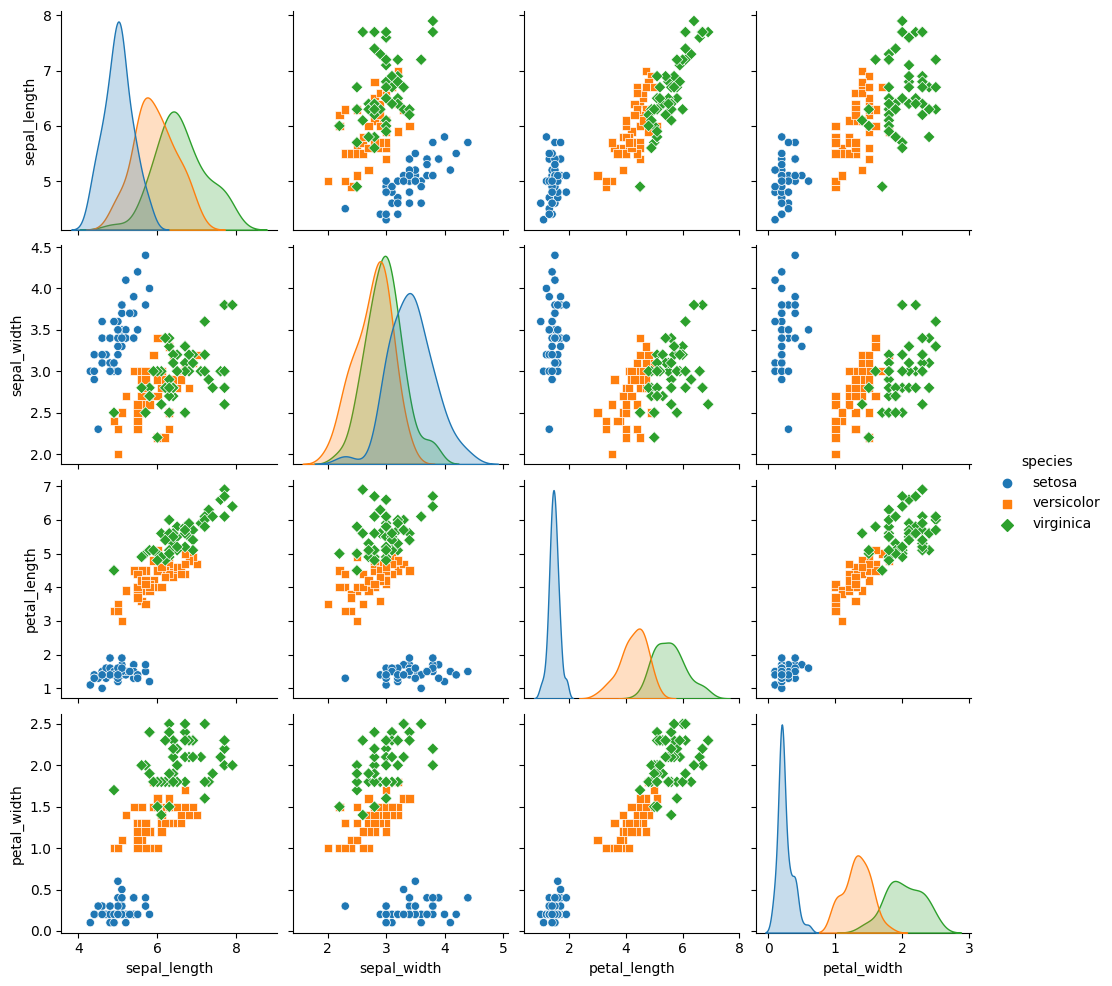

In [9]:
# Visualize the distribution of each feature
sns.pairplot(iris, hue='species', markers=['o', 's', 'D'])
plt.show()

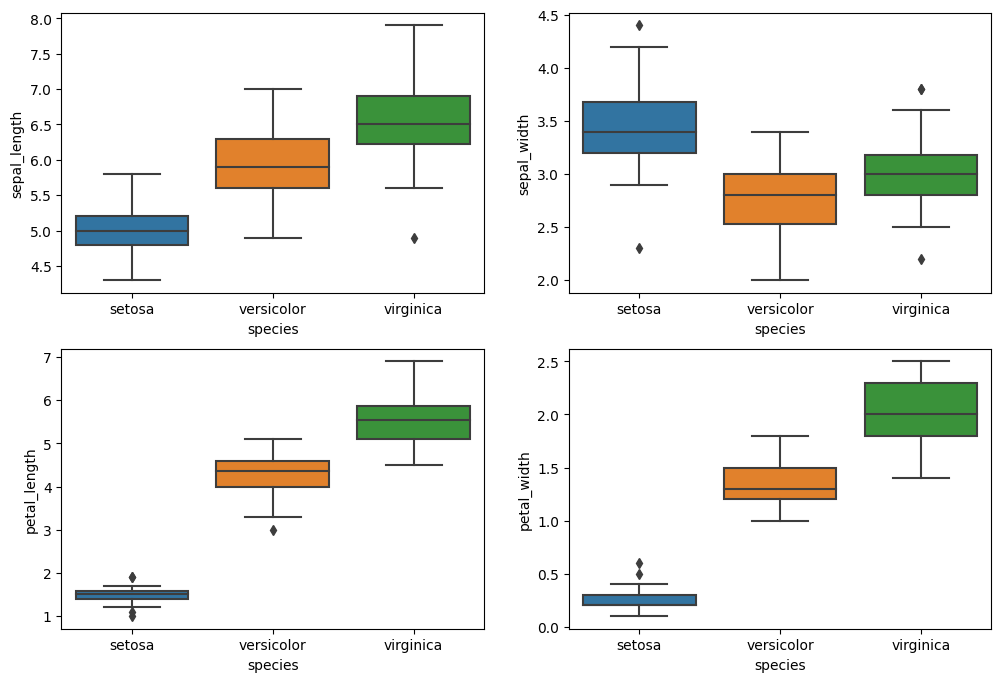

In [10]:
# Box plots for each feature by species
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris)
plt.show()

<ipython-input-11-697bab437aed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris.corr()


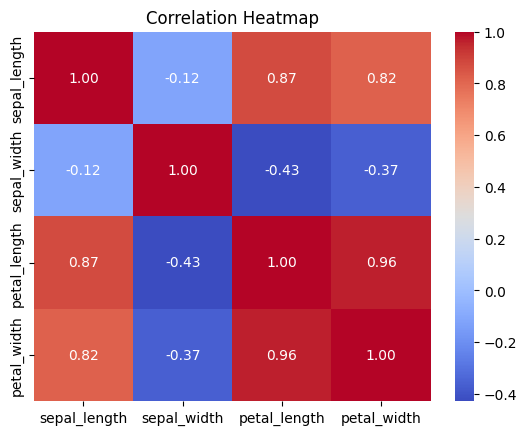

In [11]:
# Correlation heatmap
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

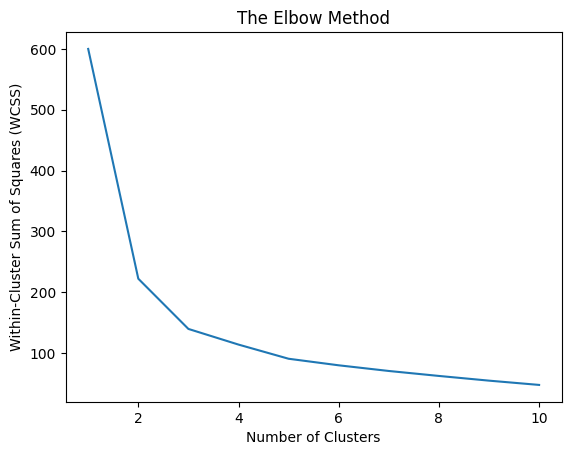

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


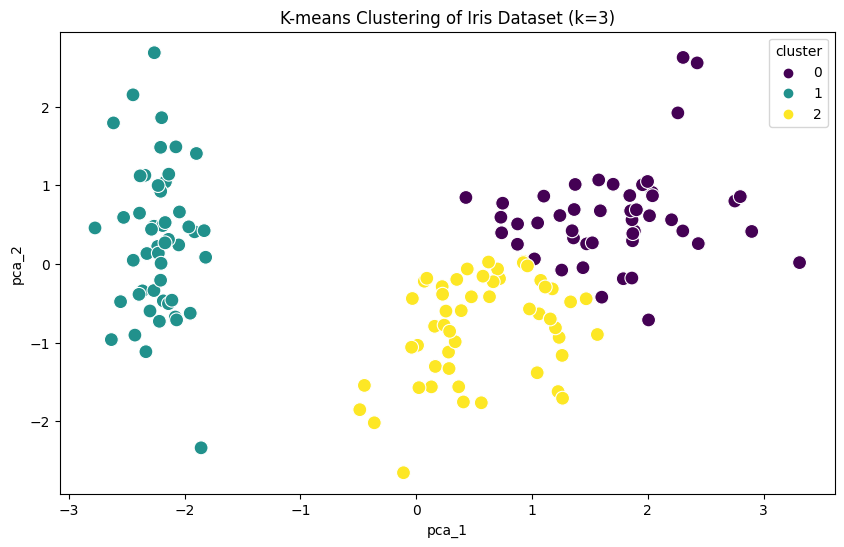

In [12]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

# Encode the species labels
label_encoder = LabelEncoder()
iris['species_encoded'] = label_encoder.fit_transform(iris['species'])

# Extract features (sepal length, sepal width, petal length, petal width)
X = iris.iloc[:, :-2]  # Exclude 'species' and 'species_encoded' columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Apply K-means clustering with the optimal number of clusters
optimal_k = 3  # Adjust based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
iris['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
iris['pca_1'] = X_pca[:, 0]
iris['pca_2'] = X_pca[:, 1]

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=iris, palette='viridis', s=100)
plt.title(f'K-means Clustering of Iris Dataset (k={optimal_k})')
plt.show()


<Figure size 800x500 with 0 Axes>

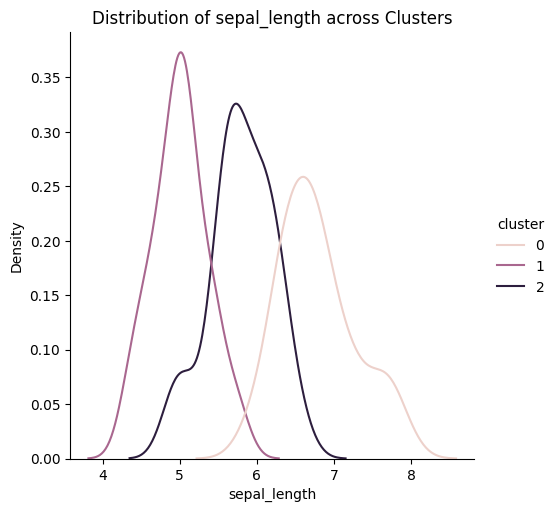

<Figure size 800x500 with 0 Axes>

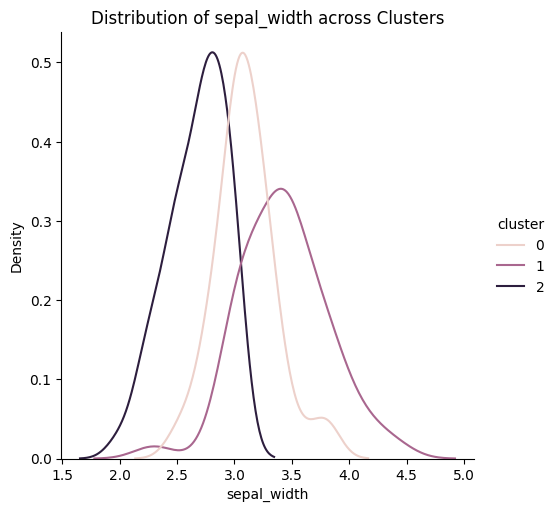

<Figure size 800x500 with 0 Axes>

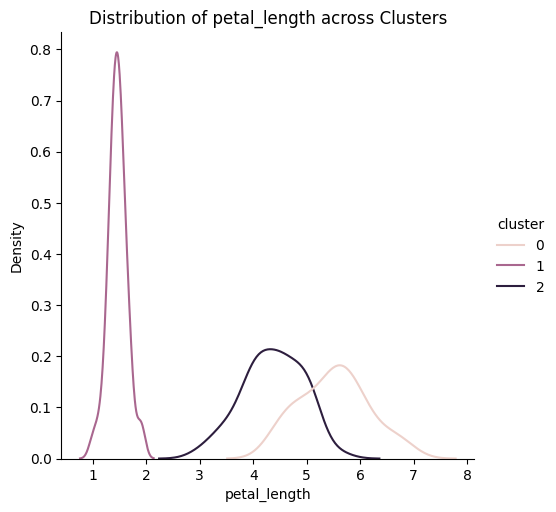

<Figure size 800x500 with 0 Axes>

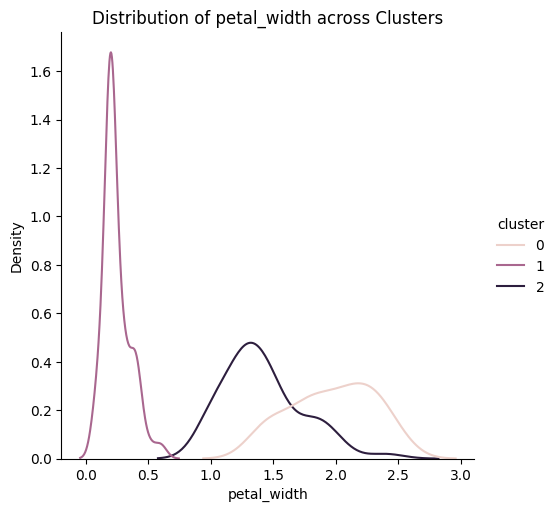

In [13]:
# Create displots for different features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.displot(data=iris, x=feature, hue='cluster', kind='kde', height=5)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


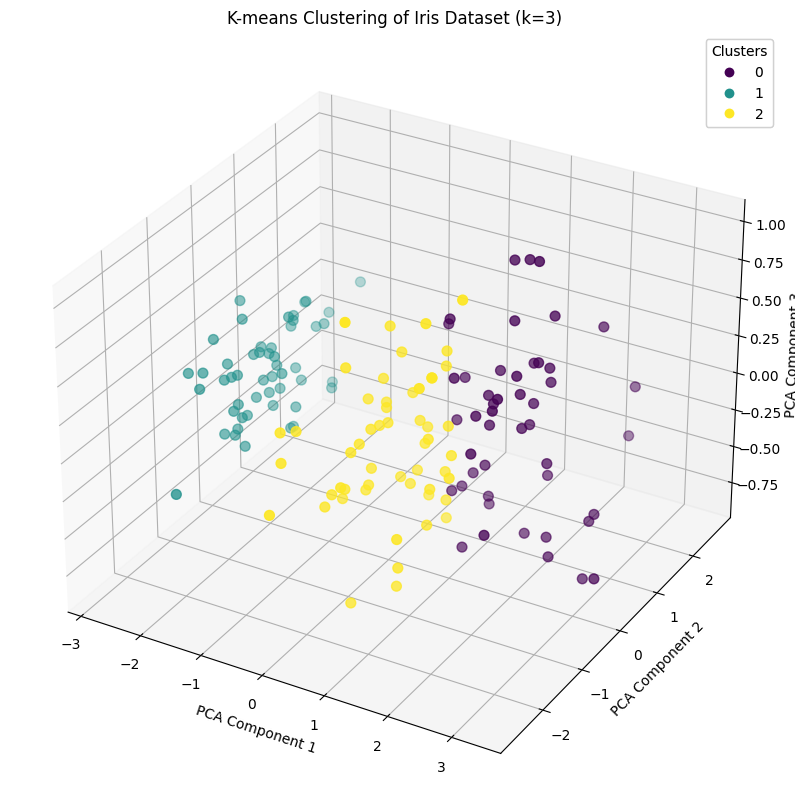

In [14]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

# Encode the species labels
label_encoder = LabelEncoder()
iris['species_encoded'] = label_encoder.fit_transform(iris['species'])

# Extract features (sepal length, sepal width, petal length, petal width)
X = iris.iloc[:, :-2]  # Exclude 'species' and 'species_encoded' columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with the optimal number of clusters
optimal_k = 3  # Adjust based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
iris['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)  # Use 3 components for 3D visualization
X_pca = pca.fit_transform(X_scaled)
iris['pca_1'] = X_pca[:, 0]
iris['pca_2'] = X_pca[:, 1]
iris['pca_3'] = X_pca[:, 2]

# 3D Scatter plot of the clusters
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    xs=iris['pca_1'],
    ys=iris['pca_2'],
    zs=iris['pca_3'],
    c=iris['cluster'],
    cmap='viridis',
    s=50
)

# Add labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title(f'K-means Clustering of Iris Dataset (k={optimal_k})')

# Add a colorbar
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Show the plot
plt.show()
